# Forma de la Tierra

En este código se busca ilustrar la forma de la tierra con base en el libro de F. Javier Gil Chica "Teoría de Eclipses, Ocultaciones y Tránsitos". Se va a hacer uso de las ecuaciones obtenidas por el autor para describir las coordenadas "x" y "y" de la supericie de la tierra y el radio de esta misma. Las expresiones algebraicas serían las siguientes:

Sean las constantes $a,b,c,e$, donde se definen de la siguiente manera:

\begin{align*}
a &= \text{semieje mayor o radio ecuatorial} && c = \text{achatamiento terrestre} \\ 
b &= \text{semieje menor o radio polar} && e = \text{eccentricidad de la elipse meridiana}
\end{align*}

Las últimas dos se definen a partir de las primeras, por lo tanto se definen con estos valores:

\begin{align*}
a = 6378km && b = 6357km
\end{align*}

Entonces, según Javier Gil Chica, se define el achatamiento y la eccentricidad cómo:

\begin{align*}
c = 1 - \frac{b}{a} && e = 1 - (1-c)^{2}
\end{align*}

Ahora, se definen las coordenadas:

\begin{align*}
x = \rho \cos {\varphi}' &&& y = \rho \sin {\varphi}' \\
\\
\rho &= a\frac{1-2{e}^{2}{\sin}^{2}\varphi + {e}^{4}{\sin}^{2}\varphi}{(1-{e}^{2}{\sin}^{2}\varphi)^{\frac{1}{2}}}
\end{align*}

Asimismo, se debe aclarar:

\begin{align*}
\varphi &= \text{latitud geográfica} \\ 
\varphi' &= \text{latitud geocéntrica}
\end{align*}

<img src="geo_coords.png" alt="Coordenadas geográficas" width="300"/>

$\theta$ Geocéntrico

$\phi$ Geodésico o geografica

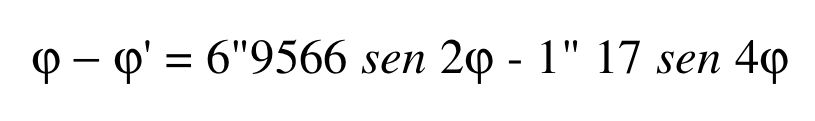

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.optimize import root

In [ ]:
# Hay que calcular el angulo geografico a partir del geocentrico

c1 = 6.9566 * (np.pi / 648000) # Constante 1
c2 = 1.17 * (np.pi / 648000) # Constante 2

phi_prime_n = np.arange(0,np.pi,0.001, dtype= float)

def f(phi, phi_prime_n):
	return phi - c1*np.sin(2*phi) + c2*np.sin(4*phi) - phi_prime_n # = 0

sol = np.zeros(len(phi_prime_n))
for i in range(len(phi_prime_n)):
	
	sol[i] = root(f, x0 = phi_prime_n[i], args = (phi_prime_n[i])).x[0]
	#print(root(f, x0 = phi_prime_n[i], args = (phi_prime_n[i])).x)

sol

array([0.00000000e+00, 1.00004477e-03, 2.00008953e-03, ...,
       3.13899988e+00, 3.13999993e+00, 3.14099997e+00], shape=(3142,))

In [36]:
# Se definen constantes
a = 6378 # semieje mayor
b = 6357 # semieje menor
c = 1 - b/a # achatamiento terrestre
e = 1 - (1-c)**2 # eccentricidad 

Text(0, 0.5, 'Eje z')

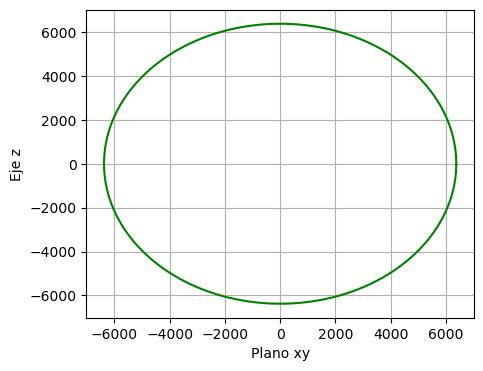

In [67]:
rho = a*(1-2*(e)**(2)*np.sin(sol)**2 + (e)**(4)*(np.sin(sol))**2)/(np.sqrt(1-(e)**(2)*(np.sin(sol)**2)))# radio de la tierra
xy = rho*np.cos(phi_prime_n)
z = rho*np.sin(phi_prime_n)


fig, ax = plt.subplots(1,1, figsize = (5,4))

ax.plot(xy,z, color = 'g')
ax.plot(xy,-z, color = 'g')
ax.grid()
ax.set_xlabel("Plano xy")
ax.set_ylabel("Eje z")

Text(0.5, 0, 'Z')

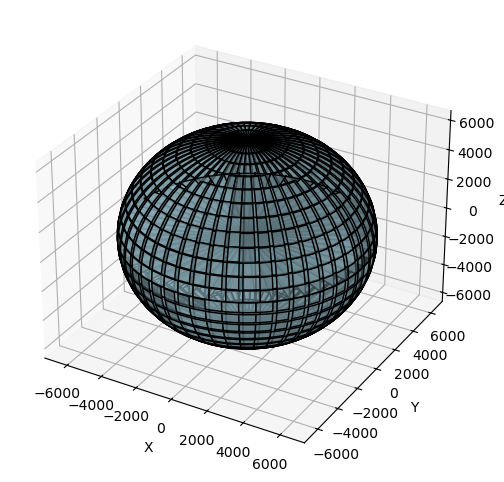

In [70]:
from mpl_toolkits.mplot3d import Axes3D


# Reflejar los datos para obtener la parte inferior
xy_full = np.concatenate((xy, xy))
z_full = np.concatenate((z, -z))
phi_full = np.concatenate((phi_prime_n, -phi_prime_n))

# Definir un conjunto de ángulos para la revolución
theta = np.linspace(0, 2 * np.pi, 100)

# Crear la malla
Theta, Phi = np.meshgrid(theta, phi_full)

# Parametrización en coordenadas cilíndricas
X = np.outer(xy_full, np.cos(theta))
Y = np.outer(xy_full, np.sin(theta))
Z = np.outer(z_full, np.ones_like(theta))

# Graficar
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, color='lightblue', edgecolor='k', alpha=0.6)

# Etiquetas
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')